In [1]:
import pandas  as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn.cluster as cluster



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("goyaladi/customer-spending-dataset")

print("E:\My Training -AI&ML:", path)

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


E:\My Training -AI&ML: C:\Users\rahul\.cache\kagglehub\datasets\goyaladi\customer-spending-dataset\versions\1


In [3]:
dt = pd.read_csv("customer_data.csv")
dt.head()

name  age  gender    education  income   country  \
0  Teresa Williams MD   42  Female  High School   53936  Slovenia   
1     Christine Myers   49  Female       Master   82468     Aruba   
2       Dwayne Moreno   55    Male     Bachelor   56941    Cyprus   
3          Amy Norton   24  Female     Bachelor   60651     Palau   
4         Tonya Adams   64    Male       Master   81884    Zambia   

   purchase_frequency   spending  
0                 0.9  13227.120  
1                 0.6  12674.040  
2                 0.3   5354.115  
3                 0.2   2606.510  
4                 0.9  18984.780

In [4]:
# drop the columns that exist in the dataframe
dt = dt.drop(columns=['gender', 'country'])
dt.head()

name  age    education  income  purchase_frequency   spending
0  Teresa Williams MD   42  High School   53936                 0.9  13227.120
1     Christine Myers   49       Master   82468                 0.6  12674.040
2       Dwayne Moreno   55     Bachelor   56941                 0.3   5354.115
3          Amy Norton   24     Bachelor   60651                 0.2   2606.510
4         Tonya Adams   64       Master   81884                 0.9  18984.780

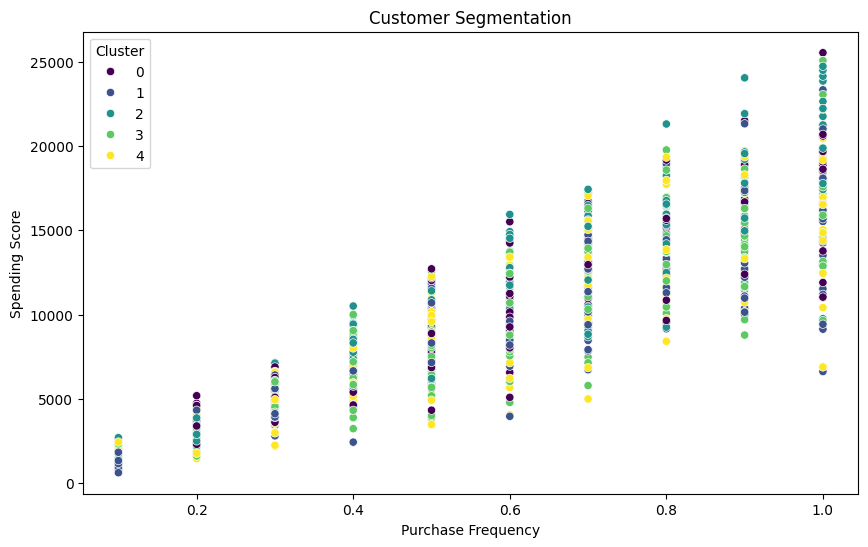

In [5]:
from sklearn.cluster import KMeans

# Prepare the features for clustering
X = dt[["income", "spending"]].values

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
dt["cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt, x="purchase_frequency", y="spending", hue="cluster", palette="viridis")
plt.title("Customer Segmentation")
plt.xlabel("Purchase Frequency")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()


In [6]:
df = dt.copy(1000)
X = df[['income', 'spending']].values
kmeans = cluster.KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

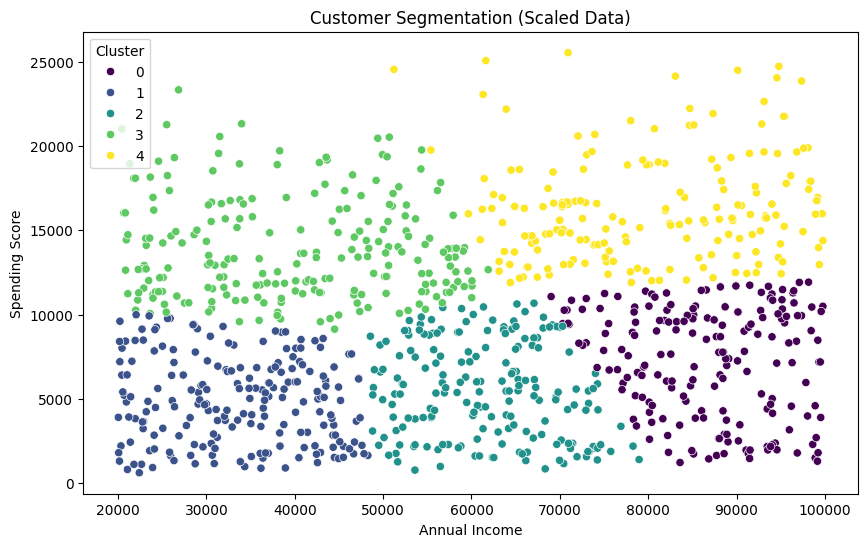

In [7]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = cluster.KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
dt["cluster"] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt, x="income", y="spending", hue="cluster", palette="viridis")
plt.title("Customer Segmentation (Scaled Data)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

In [8]:
# copyt the top 100 data of the name of the customer
dt.head(100).to_csv("top_100_customers.csv", index=False)




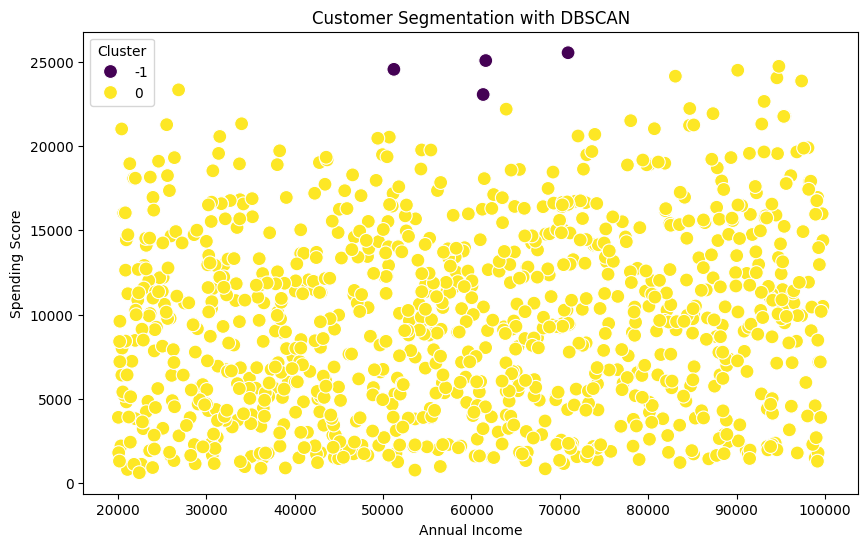

In [9]:
# customer segmentation with dbscan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
kmeans = cluster.KMeans(n_clusters=5, random_state=42)
dbscan.fit(X_scaled)
dt["dbscan_cluster"] = dbscan.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt, x="income", y="spending", hue="dbscan_cluster", palette="viridis", s=100)
plt.title("Customer Segmentation with DBSCAN")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()